# Analysis of Japanese Trade Through Python

### For this project, we intend to analyze a large amount of data about Japanese trade by unit. The data gives us information about imports and exports from 1988 to 2015. We are interested in visualizing the data in a few different ways in order to find important trends. These graphs will focus on Japan's trade by area and by year. 

The data can be found here: https://www.kaggle.com/zanjibar/japan-trade-statistics

# Creating a Bar Plot for the Exports and Imports of Each Area

The first graph we will create is going to be a bar graph containing a set of two bars for each area. One bar will represent the imports and the other bar will represent the exports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sd

year = pd.read_csv('file:///C:/Users/mkassir/Downloads/japan-trade-statistics/year_1988_2015.csv')
country_list = pd.read_csv('file:///C:/Users/mkassir/Downloads/japan-trade-statistics/country_eng.csv')

Taking a look at the dataframe listing all the imports and exports, we see that the data tells us whether each row is about an import or an export, the year it was sent, and information that is numerical becuase it refers to other tables. We are interested in what countries the exports/imports are associated with. 

In [2]:
year.head()

,exp_imp,Year,Country,Unit1,Unit2,QY1,QY2,VY,hs2,hs4,hs6,hs9
0,1,1988,210,NaN,NO,0,3,25706,1,101,10111,10111000
1,1,1988,104,NaN,NO,0,4,5600,1,101,10119,10119000
2,1,1988,106,NaN,NO,0,6,9600,1,101,10119,10119000
3,1,1988,105,NaN,NO,0,1,1230,1,102,10290,10290000
4,1,1988,304,NaN,NO,0,2,3500,1,102,10290,10290000


First we will delete the columns we are not interested in.

In [3]:
year.drop(['Unit1','Unit2','QY1','QY2','VY','hs2','hs4','hs6','hs9'], axis=1,inplace = True)

Let's take a look at country_list:

In [4]:
country_list.head()

,Country,Country_name,Area
0,103,Republic_of_Korea,Asia
1,104,North_Korea,Asia
2,105,People's_Republic_of_China,Asia
3,106,Taiwan,Asia
4,107,Mongolia,Asia


Country_list contains the code as to which country each number represents in the dataframe. We will replace the numbers in the dataframe with names of the countries and add a column showing the area of the country.

In [5]:
country_dict = {country:name for country,name in zip(country_list['Country'],country_list['Country_name'])}
country_dict2 = {country:area for country,area in zip(country_list['Country_name'],country_list['Area'])}

In [6]:
year['Country'] = year['Country'].map(country_dict)
year['Area'] = year['Country'].map(country_dict2)

Now we can drop the 'Country' column becuase we will not be using it.

In [7]:
year.drop(['Country'], axis=1, inplace=True)

Becuase the year of the export or import will not be bar plot, we will eliminate the 'Year' column.

In [8]:
year.drop(['Year'], axis=1, inplace=True)

We will split the dataframe into two dataframes: one for the imports and one for exports

In [9]:
year_imp = year[year.exp_imp != 1]
year_exp = year[year.exp_imp != 2]

Becuase we will show the exports and imports by area, we will group them by the area they took place in.

In [10]:
year_imp = year_imp.groupby('Area').count()
year_exp = year_exp.groupby('Area').count()

Let us take a look at the two dataframes:

In [11]:
year_imp

,exp_imp
Area,
Africa,55087
Asia,827087
Central_and_East_Europe_Russia,107877
Integrated_Hozei_Ar_Special_Area,3
Middle_East,39655
Middle_and_South_America,122180
North_America,221482
Oceania,88086
Special_Area,307


In [12]:
year_exp

,exp_imp
Area,
Africa,370716
Asia,1449314
Central_and_East_Europe_Russia,197946
Middle_East,342424
Middle_and_South_America,482289
North_America,194118
Oceania,256449
Special_Area,68
Western_Europe,906038


The "Integrated_Hozei_Ar_Special_Area" and the "Special_Area" columns are so small that they will not appear on the bar plot. For this reason, they will be deleted.

In [13]:
year_imp.drop(['Integrated_Hozei_Ar_Special_Area','Special_Area'], axis=0, inplace=True)
year_exp.drop(['Special_Area'], axis=0, inplace=True)

And now to re-view them:

In [14]:
year_imp

,exp_imp
Area,
Africa,55087
Asia,827087
Central_and_East_Europe_Russia,107877
Middle_East,39655
Middle_and_South_America,122180
North_America,221482
Oceania,88086
Western_Europe,928034


The next step is to 

In [15]:
year_exp

,exp_imp
Area,
Africa,370716
Asia,1449314
Central_and_East_Europe_Russia,197946
Middle_East,342424
Middle_and_South_America,482289
North_America,194118
Oceania,256449
Western_Europe,906038


In order to create a bar plot, we need to convert our dataframe to a list. We will create 3 lists total: One list will contain the areas, one list will contain the imports, and one list will contain the exports.

In [16]:
Areas = year_exp.index.tolist()
year_imp = year_imp['exp_imp'].tolist()
year_exp = year_exp['exp_imp'].tolist()

Now we will make sure the lists look correct.

In [17]:
year_imp

[55087L, 827087L, 107877L, 39655L, 122180L, 221482L, 88086L, 928034L]

One more problem is that the 'Areas' list is too long to list on the bottom of the bar graph, so we will abbreviate parts of it.

In [18]:
Areas

['Africa',
 'Asia',
 'Central_and_East_Europe_Russia',
 'Middle_East',
 'Middle_and_South_America',
 'North_America',
 'Oceania',
 'Western_Europe']

In [19]:
Areas = ['Africa','Asia','CE and Russia','ME','SA','NA', 'Oceania','WE']

Now the graph:

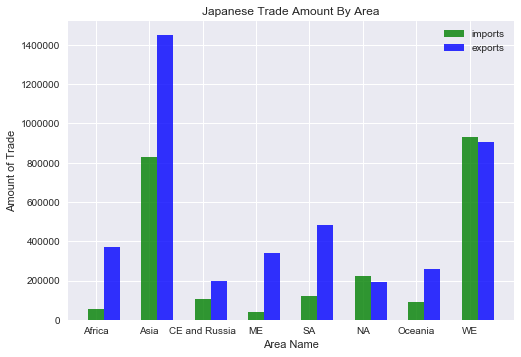

In [42]:
index = np.arange(len(Areas))
bar_width = 0.4

plt.bar(index, year_imp, 0.3, alpha = 0.8, color='green', label='imports')
plt.bar(index + 0.3, year_exp, 0.3, alpha = 0.8, color='blue', label='exports')

plt.xticks(index, Areas)

plt.xlabel("Area Name")
plt.ylabel("Amount of Trade")
plt.title('Japanese Trade Amount By Area')

plt.legend()
plt.show()

### The plot shows that Japan's biggest partner in imports is Western Europe, and it exports most to other Asian countries.

# Creating a Graph Showing the Change in Trade Over Time

We will create a graph that shows the amount of imports and the amount of exports each year

First we will import the dataframe again to obtain it without the previous changes.

In [21]:
year = pd.read_csv('file:///C:/Users/mkassir/Downloads/japan-trade-statistics/year_1988_2015.csv')

We start by taking the only two colums we need for this graph, which is the type of trade and the year the trade took place.

In [22]:
year_trends =  year[['exp_imp','Year']]

Viewing it shows us that we have only the exact data we want.

In [23]:
year_trends.head()

,exp_imp,Year
0,1,1988
1,1,1988
2,1,1988
3,1,1988
4,1,1988


Now we will seperate the dataframe by imports and exports so we can graph each as its own line.

In [24]:
year_imports = year_trends[year_trends.exp_imp != 1]
year_exports = year_trends[year_trends.exp_imp != 2]

Checking the value counts by Year groups the amount of trade by year. As a result, we will organize the data by value count and then view it.

In [25]:
year_imp_val = year_imports['Year'].value_counts()
year_exp_val = year_exports['Year'].value_counts()

In [26]:
year_imp_val.head()

2005    94707
2006    94649
2015    94506
2007    94249
2014    93702
Name: Year, dtype: int64

A quick look at the data shows us that we need to organize the data in the order of the years.

In [27]:
year_imp_val = year_imp_val.sort_index()
year_exp_val = year_exp_val.sort_index()

We are ready to create the graph:

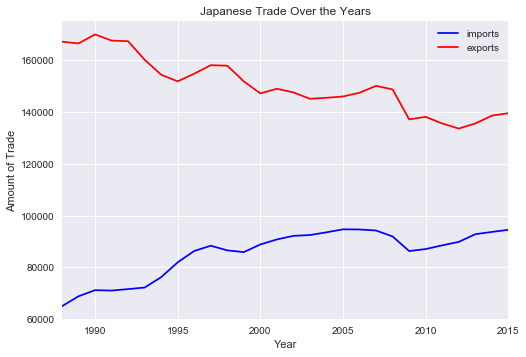

In [43]:
year_imp_val.plot(color = "blue", label='imports')
year_exp_val.plot(color = "red", label='exports')

plt.xlabel('Year')
plt.ylabel('Amount of Trade')
plt.title('Japanese Trade Over the Years')

plt.legend()
plt.show()

### This graph shows that the overall imports and exports of Japan over the years. The exports have actually been decreasing, while the imports have been increasing.

# Creating a Graph that Shows the Change in Trade by Area Over Time

As our final graph, we would like to show how the trade in each area over time. It would look similar to the previous graph, but exports and imports will not be seperated

We will import the table again to take the data we need and then add our "Area" column.

In [29]:
year = pd.read_csv('file:///C:/Users/mkassir/Downloads/japan-trade-statistics/year_1988_2015.csv')

year['Country'] = year['Country'].map(country_dict)
year['Area'] = year['Country'].map(country_dict2)

Let us take a look on our dataframe.

In [30]:
year.head()

,exp_imp,Year,Country,Unit1,Unit2,QY1,QY2,VY,hs2,hs4,hs6,hs9,Area
0,1,1988,France,NaN,NO,0,3,25706,1,101,10111,10111000,Western_Europe
1,1,1988,North_Korea,NaN,NO,0,4,5600,1,101,10119,10119000,Asia
2,1,1988,Taiwan,NaN,NO,0,6,9600,1,101,10119,10119000,Asia
3,1,1988,People's_Republic_of_China,NaN,NO,0,1,1230,1,102,10290,10290000,Asia
4,1,1988,United_States_of_America,NaN,NO,0,2,3500,1,102,10290,10290000,North_America


The only columns we will be using are "Year" and "Area", so we will create a new dataframe with these two columns.

In [31]:
year_area = year[['Year','Area']]

Now we will group each area by the year, which will add up all the rows that feature the same area and year.

In [32]:
year_area = pd.get_dummies(year_area)
year_area = year_area.groupby('Year')

To graph the datagrame, we will add up all the rows for each area and then plot it.

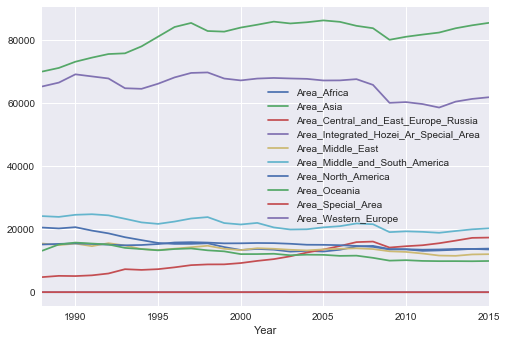

In [33]:
year_area.sum().plot()
plt.show()

### Unsurprisingly, Japan trades most with Asia and Western Europe. It is interesting to see that the rate of trade has been relatively consistent. Maybe this is a reflection of the fact that Japan's economy has not grown much since the 1990s.

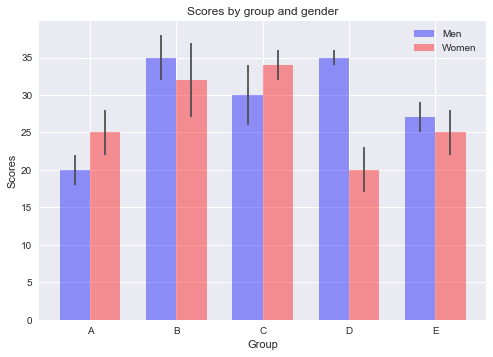

In [38]:
n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.show()